### Load R packages

In [2]:
library("tidyverse")
library("readxl")
library("stringr")
library("ggplot2")
library("dplyr")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Import data in R

In [3]:
MC.df <- read_excel("/Users/jasminereighard/Downloads/Final.xlsx") 

In [4]:
run1 <- read_excel("/Users/jasminereighard/Downloads/Final.xlsx",
                  sheet = "Run1_Jun8")

In [5]:
run2 <- read_excel("/Users/jasminereighard/Downloads/Final.xlsx",
                  sheet = "Run2_Jun28")

In [6]:
run3 <- read_excel("/Users/jasminereighard/Downloads/Final.xlsx",
                  sheet = "Run3_Jul9")

In [7]:
run4 <- read_excel("/Users/jasminereighard/Downloads/Final.xlsx",
                  sheet = "Run4_Sep9")

In [8]:
run5 <- read_excel("/Users/jasminereighard/Downloads/Final.xlsx",
                  sheet = "Run5_Sep23")

In [9]:
run6 <- read_excel("/Users/jasminereighard/Downloads/Final.xlsx",
                  sheet = "Run6_Oct7")

# Tidying Data 
## 1. Combine all data into one table 

In [10]:
run1$run <- (1)

In [11]:
run2$run <- (2)

In [12]:
run3$run <- (3)

In [13]:
run4$run <- (4)

In [14]:
run5$run <- (5)

In [15]:
run6$run <- (6)

In [16]:
allruns <- rbind(run1, run2, run3, run4, run5, run6)

In [17]:
head(allruns)

date,ID,lanai side,temperature(C),Inital weight(g),final weight(g),salinity (ppt),absorbance(663.8),absorbance(646.8),run
<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-06-08,msa1-1,ewa,27,0.2846,0.3524,35,0.6325,0.2666,1
2022-06-08,msa1-2,ewa,27,0.2918,0.4160,35,0.4261,0.1934,1
2022-06-08,msa1-3,ewa,27,0.2581,0.3254,35,0.8795,0.3769,1
2022-06-08,msa1-4,ewa,27,0.2767,0.5124,35,0.5135,0.3907,1
2022-06-08,msb1-1,ewa,27,0.3054,0.3656,35,0.8350,0.3757,1
2022-06-08,msb1-2,ewa,27,0.2984,0.4065,35,0.5761,0.2602,1


## 2. Separate multiple variables within ID column
#### i.e. Each variable forms a column

In [18]:
allruns[c('Species', 'Treatment')] <- str_split_fixed(allruns$ID, '-', 2)

In [19]:
head(allruns)

date,ID,lanai side,temperature(C),Inital weight(g),final weight(g),salinity (ppt),absorbance(663.8),absorbance(646.8),run,Species,Treatment
<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2022-06-08,msa1-1,ewa,27,0.2846,0.3524,35,0.6325,0.2666,1,msa1,1
2022-06-08,msa1-2,ewa,27,0.2918,0.4160,35,0.4261,0.1934,1,msa1,2
2022-06-08,msa1-3,ewa,27,0.2581,0.3254,35,0.8795,0.3769,1,msa1,3
2022-06-08,msa1-4,ewa,27,0.2767,0.5124,35,0.5135,0.3907,1,msa1,4
2022-06-08,msb1-1,ewa,27,0.3054,0.3656,35,0.8350,0.3757,1,msb1,1
2022-06-08,msb1-2,ewa,27,0.2984,0.4065,35,0.5761,0.2602,1,msb1,2


## 3. Get rid of run variable number in 'Species' column

In [20]:
new_species <- str_sub(allruns$Species, 1, str_length(allruns$Species)-1)

In [21]:
allruns$Species <- new_species

In [22]:
head(allruns)

date,ID,lanai side,temperature(C),Inital weight(g),final weight(g),salinity (ppt),absorbance(663.8),absorbance(646.8),run,Species,Treatment
<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2022-06-08,msa1-1,ewa,27,0.2846,0.3524,35,0.6325,0.2666,1,msa,1
2022-06-08,msa1-2,ewa,27,0.2918,0.4160,35,0.4261,0.1934,1,msa,2
2022-06-08,msa1-3,ewa,27,0.2581,0.3254,35,0.8795,0.3769,1,msa,3
2022-06-08,msa1-4,ewa,27,0.2767,0.5124,35,0.5135,0.3907,1,msa,4
2022-06-08,msb1-1,ewa,27,0.3054,0.3656,35,0.8350,0.3757,1,msb,1
2022-06-08,msb1-2,ewa,27,0.2984,0.4065,35,0.5761,0.2602,1,msb,2


## 4. Remove column with multiple variables

In [23]:
allruns$ID <- NULL

In [24]:
head(allruns)

date,lanai side,temperature(C),Inital weight(g),final weight(g),salinity (ppt),absorbance(663.8),absorbance(646.8),run,Species,Treatment
<dttm>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2022-06-08,ewa,27,0.2846,0.3524,35,0.6325,0.2666,1,msa,1
2022-06-08,ewa,27,0.2918,0.4160,35,0.4261,0.1934,1,msa,2
2022-06-08,ewa,27,0.2581,0.3254,35,0.8795,0.3769,1,msa,3
2022-06-08,ewa,27,0.2767,0.5124,35,0.5135,0.3907,1,msa,4
2022-06-08,ewa,27,0.3054,0.3656,35,0.8350,0.3757,1,msb,1
2022-06-08,ewa,27,0.2984,0.4065,35,0.5761,0.2602,1,msb,2


## 5. Separate growth and absorbance observations into two tables

In [25]:
growthdata <- allruns[,c("date", "run", "Species", "Treatment", "lanai side", "temperature(C)", "Inital weight(g)", "final weight(g)", "salinity (ppt)")]

In [26]:
head(growthdata)

date,run,Species,Treatment,lanai side,temperature(C),Inital weight(g),final weight(g),salinity (ppt)
<dttm>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2022-06-08,1,msa,1,ewa,27,0.2846,0.3524,35
2022-06-08,1,msa,2,ewa,27,0.2918,0.4160,35
2022-06-08,1,msa,3,ewa,27,0.2581,0.3254,35
2022-06-08,1,msa,4,ewa,27,0.2767,0.5124,35
2022-06-08,1,msb,1,ewa,27,0.3054,0.3656,35
2022-06-08,1,msb,2,ewa,27,0.2984,0.4065,35


In [27]:
absorbdata <- allruns[,c("date", "run", "Species", "Treatment", "lanai side", "temperature(C)", "salinity (ppt)", "absorbance(663.8)", "absorbance(646.8)")]

In [28]:
head(absorbdata)

date,run,Species,Treatment,lanai side,temperature(C),salinity (ppt),absorbance(663.8),absorbance(646.8)
<dttm>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2022-06-08,1,msa,1,ewa,27,35,0.6325,0.2666
2022-06-08,1,msa,2,ewa,27,35,0.4261,0.1934
2022-06-08,1,msa,3,ewa,27,35,0.8795,0.3769
2022-06-08,1,msa,4,ewa,27,35,0.5135,0.3907
2022-06-08,1,msb,1,ewa,27,35,0.8350,0.3757
2022-06-08,1,msb,2,ewa,27,35,0.5761,0.2602


# Cleaning data
## 1 - 3. Take out unnecessary variables within each tibble

In [29]:
growthdata$'lanai side' <- NULL

In [30]:
growthdata$'salinity (ppt)' <- NULL

In [31]:
growthdata$'date' <- NULL

In [32]:
head(growthdata)

run,Species,Treatment,temperature(C),Inital weight(g),final weight(g)
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,msa,1,27,0.2846,0.3524
1,msa,2,27,0.2918,0.4160
1,msa,3,27,0.2581,0.3254
1,msa,4,27,0.2767,0.5124
1,msb,1,27,0.3054,0.3656
1,msb,2,27,0.2984,0.4065


In [33]:
absorbdata$'lanai side' <- NULL

In [34]:
absorbdata$'salinity (ppt)' <- NULL

In [35]:
absorbdata$'date' <- NULL

In [36]:
head(absorbdata)

run,Species,Treatment,temperature(C),absorbance(663.8),absorbance(646.8)
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,msa,1,27,0.6325,0.2666
1,msa,2,27,0.4261,0.1934
1,msa,3,27,0.8795,0.3769
1,msa,4,27,0.5135,0.3907
1,msb,1,27,0.8350,0.3757
1,msb,2,27,0.5761,0.2602


## 4. Calculate difference between initial and post-trial weight of limu

In [37]:
growthdata$'Weight Difference(g)' <- growthdata$'final weight(g)' - growthdata$'Inital weight(g)'

In [38]:
head(growthdata)

run,Species,Treatment,temperature(C),Inital weight(g),final weight(g),Weight Difference(g)
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,msa,1,27,0.2846,0.3524,0.0678
1,msa,2,27,0.2918,0.4160,0.1242
1,msa,3,27,0.2581,0.3254,0.0673
1,msa,4,27,0.2767,0.5124,0.2357
1,msb,1,27,0.3054,0.3656,0.0602
1,msb,2,27,0.2984,0.4065,0.1081


## 5. Calculate growth rate of limu

In [39]:
growthdata$'Growth Rate (%)' <- ((growthdata$'Weight Difference(g)' / growthdata$'Inital weight(g)') * 100)  

In [40]:
head(growthdata)

run,Species,Treatment,temperature(C),Inital weight(g),final weight(g),Weight Difference(g),Growth Rate (%)
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,msa,1,27,0.2846,0.3524,0.0678,23.82291
1,msa,2,27,0.2918,0.4160,0.1242,42.56340
1,msa,3,27,0.2581,0.3254,0.0673,26.07516
1,msa,4,27,0.2767,0.5124,0.2357,85.18251
1,msb,1,27,0.3054,0.3656,0.0602,19.71185
1,msb,2,27,0.2984,0.4065,0.1081,36.22654


## 6. Change type of variables from double to integers

In [41]:
treatment_sorted <- factor(growthdata$Treatment, ordered = TRUE)
growthdata$'Treatments' <- sapply(treatment_sorted, as.integer, USE.NAMES = FALSE)
is.integer(growthdata$'Treatments')

[1] TRUE

In [42]:
head(growthdata)

run,Species,Treatment,temperature(C),Inital weight(g),final weight(g),Weight Difference(g),Growth Rate (%),Treatments
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,msa,1,27,0.2846,0.3524,0.0678,23.82291,1
1,msa,2,27,0.2918,0.4160,0.1242,42.56340,2
1,msa,3,27,0.2581,0.3254,0.0673,26.07516,3
1,msa,4,27,0.2767,0.5124,0.2357,85.18251,4
1,msb,1,27,0.3054,0.3656,0.0602,19.71185,1
1,msb,2,27,0.2984,0.4065,0.1081,36.22654,2


In [43]:
growthdata$'Treatment' <- NULL
head(growthdata)

run,Species,temperature(C),Inital weight(g),final weight(g),Weight Difference(g),Growth Rate (%),Treatments
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,msa,27,0.2846,0.3524,0.0678,23.82291,1
1,msa,27,0.2918,0.4160,0.1242,42.56340,2
1,msa,27,0.2581,0.3254,0.0673,26.07516,3
1,msa,27,0.2767,0.5124,0.2357,85.18251,4
1,msb,27,0.3054,0.3656,0.0602,19.71185,1
1,msb,27,0.2984,0.4065,0.1081,36.22654,2


In [44]:
treatment_sorted2 <- factor(absorbdata$Treatment, ordered = TRUE)
absorbdata$'Treatments' <- sapply(treatment_sorted2, as.integer, USE.NAMES = FALSE)
is.integer(absorbdata$'Treatments')

[1] TRUE

In [45]:
absorbdata$'Treatment' <- NULL
head(absorbdata)

run,Species,temperature(C),absorbance(663.8),absorbance(646.8),Treatments
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
1,msa,27,0.6325,0.2666,1
1,msa,27,0.4261,0.1934,2
1,msa,27,0.8795,0.3769,3
1,msa,27,0.5135,0.3907,4
1,msb,27,0.8350,0.3757,1
1,msb,27,0.5761,0.2602,2


# Data Visualizations
## 1. Absorbance Scatterplot

In [46]:
library(ggplot2)

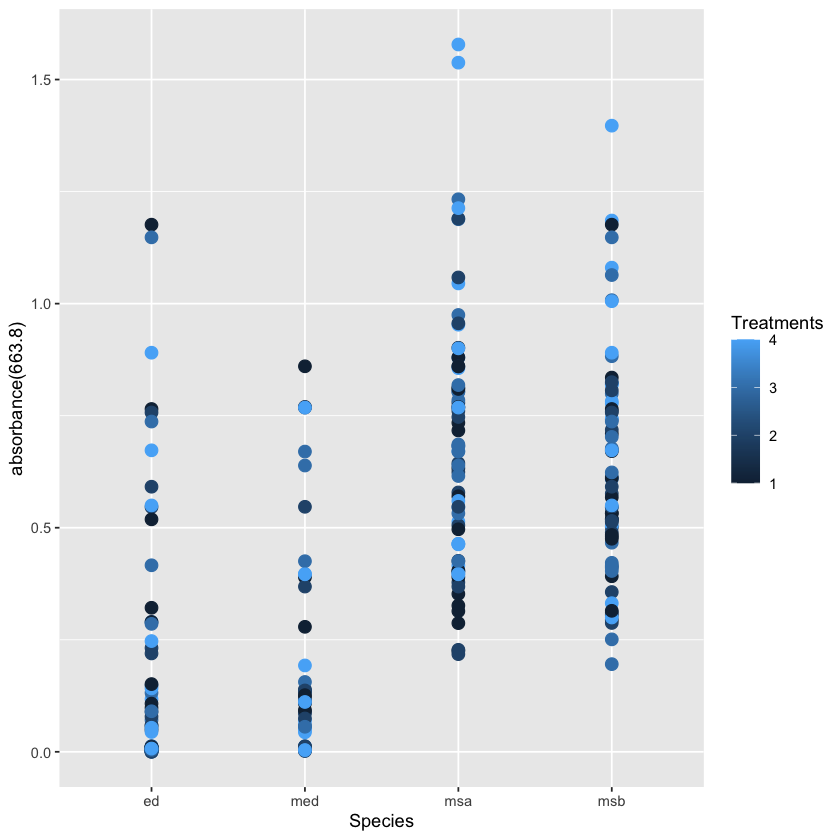

In [47]:
ggplot(data = absorbdata) + 
 geom_point(aes(x=Species, y=`absorbance(663.8)`, color=Treatments), size=3.2)

## Grouped bar plot for absorbance

In [48]:
t1sub <- subset(absorbdata, Treatments==1)
t2sub <- subset(absorbdata, Treatments==2) 
t3sub <- subset(absorbdata, Treatments==3)
t4sub <- subset(absorbdata, Treatments==4)

In [49]:
t1avg <- aggregate(t1sub$'absorbance(663.8)', list(t1sub$Species), FUN=mean)
t2avg <- aggregate(t2sub$'absorbance(663.8)', list(t2sub$Species), FUN=mean)
t3avg <- aggregate(t3sub$'absorbance(663.8)', list(t3sub$Species), FUN=mean)
t4avg <- aggregate(t4sub$'absorbance(663.8)', list(t4sub$Species), FUN=mean)

In [50]:
absorb_sppavg <- rbind(t1avg, t2avg, t3avg, t4avg)

In [51]:
absorb_sppavg$Treatment <- c(1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4)

In [52]:
barchart_absorb <- ggplot(absorb_sppavg, aes(x=Group.1, y=x)) + 
    geom_bar(position="dodge", stat="identity",aes(fill=factor(Treatment))) +
           labs(
        x = "Species",
        y = "Average Absorbance(663.8)",
        fill = "Treatment")  

In [53]:
fixedab_bc <- barchart_absorb +
    theme_classic() +
    theme(axis.text = element_text(size = 13))

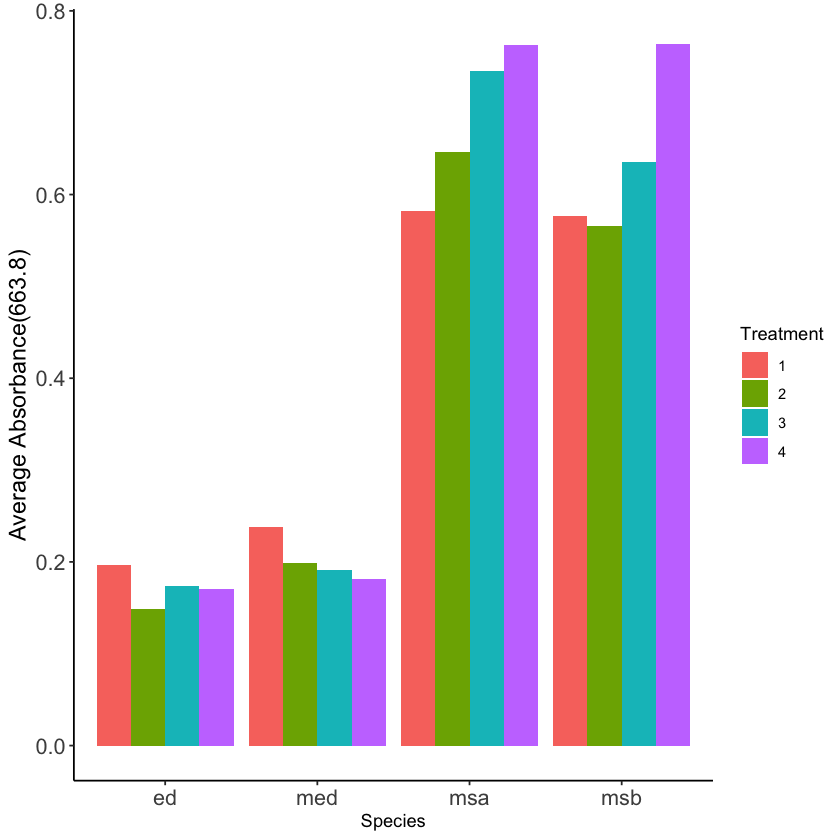

In [54]:
fixedab_bc + theme(axis.title.y = element_text(size = 14))

## 3. Growth Rate Histogram 

In [55]:
msasub <- subset(growthdata, Species=='msa')
msbsub <- subset(growthdata, Species=='msb')
edsub <- subset(growthdata, Species=='ed')
medsub <- subset(growthdata, Species=='med')

In [56]:
head(msasub)

run,Species,temperature(C),Inital weight(g),final weight(g),Weight Difference(g),Growth Rate (%),Treatments
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,msa,27,0.2846,0.3524,0.0678,23.82291,1
1,msa,27,0.2918,0.4160,0.1242,42.56340,2
1,msa,27,0.2581,0.3254,0.0673,26.07516,3
1,msa,27,0.2767,0.5124,0.2357,85.18251,4
1,msa,27,0.2191,0.2800,0.0609,27.79553,1
1,msa,27,0.2551,0.3581,0.1030,40.37632,2


In [57]:
msahis <- ggplot(msasub, aes(x=`Growth Rate (%)`)) +
  geom_histogram(alpha=0.5, position="identity", aes(fill=factor(Treatments)))
    

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



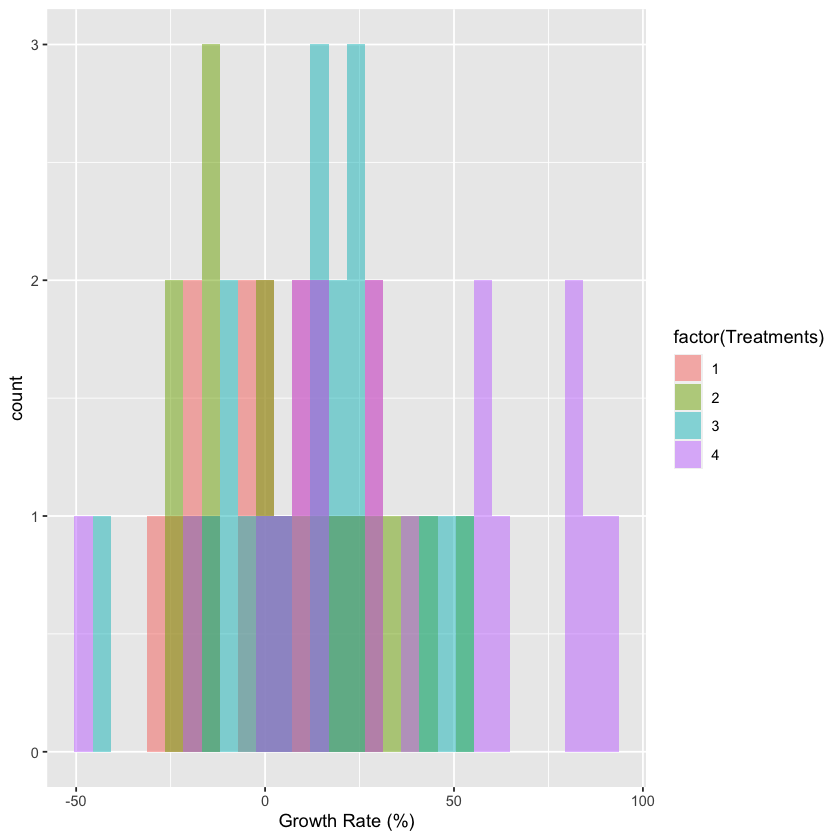

In [58]:
msahis

## 4. Scatterplot with Fitted Line for Growth Rate by Treatment

In [59]:
growt1sub <- subset(growthdata, Treatments==1)
growt2sub <- subset(growthdata, Treatments==2)
growt3sub <- subset(growthdata, Treatments==3)
growt4sub <- subset(growthdata, Treatments==4)

In [107]:
scatter_plot <- ggplot(growt1sub, aes(x = `Inital weight(g)`, y = `final weight(g)`)) +
    geom_point(aes(color = factor(Species))) +
    labs(
        title = "Total Growth Rate (%) for Treatment 1",
        x = "Inital weight (g)",
        y = "Final weight (g)") +
    stat_smooth(method = "lm",
        col = "#C42126",
        se = FALSE,
        size = 1)

`geom_smooth()` using formula 'y ~ x'



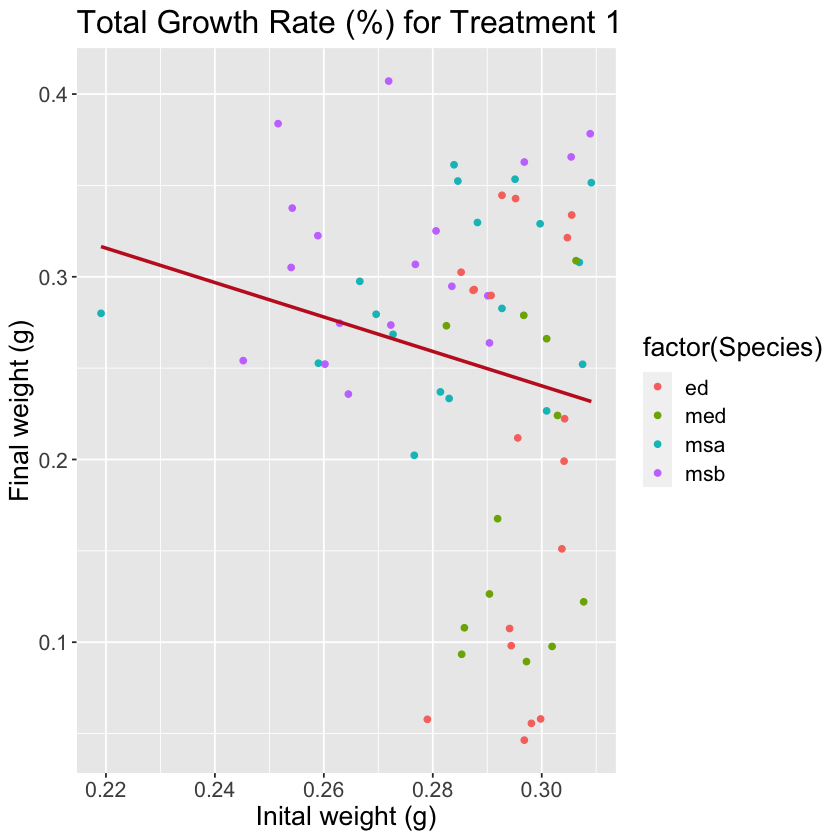

In [111]:
fixedscat_plot <- scatter_plot +
    theme(text = element_text(size = 16))
fixedscat_plot

## Box and Whisker Plot for Growth Rate by Treatment

In [101]:
sppbox_whisker <- ggplot(growt1sub, aes(x =Species, y = `Growth Rate (%)`, fill=Species)) +
    geom_boxplot(outlier.colour="black", outlier.shape=16, outlier.size=2) +
    labs(
        title = "Total Growth Rate (%) for Treatment 1",
        x = "Species",
        y = "Growth Rate (%)"
      )

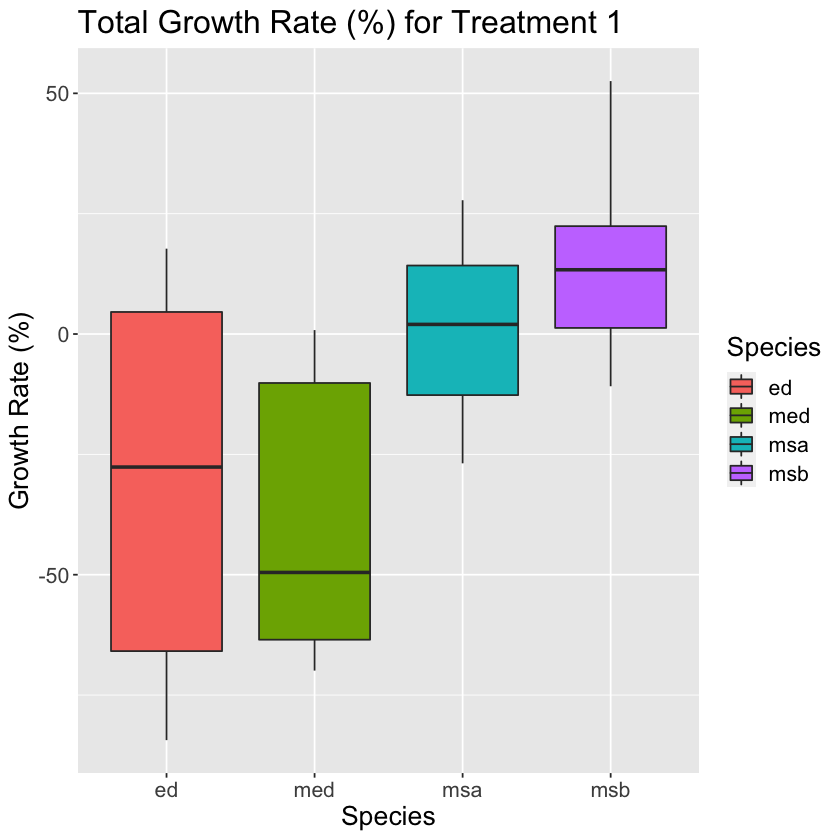

In [102]:
fixsppbox_whisker <- sppbox_whisker +
    theme(text = element_text(size = 16))
fixsppbox_whisker